In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# reading the train and test datasets

In [88]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Analysing the datasets

In [89]:
train.shape,test.shape

((31647, 18), (13564, 17))

In [90]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [91]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

# Exploratory Data Analysis

## Looking for missing values

In [92]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no missing values in train dataset

In [93]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

There are no missing values in test dataset

In [94]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [95]:
test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [96]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


We can intutively say that the "ID" column will have no impact on the "Subscribed" column, so we can remove the "ID" column.



In [97]:
train.drop(["ID"],axis=1,inplace=True)
test.drop(["ID"],axis=1,inplace=True)

In [98]:
train.shape,test.shape

((31647, 17), (13564, 16))

## Features with One value

Now we are going to look for features with only one value because such features will havew no impact on our target variable 

In [99]:
for c in train.columns:
    print(c," has ",train[c].nunique()," unique values")

age  has  76  unique values
job  has  12  unique values
marital  has  3  unique values
education  has  4  unique values
default  has  2  unique values
balance  has  6326  unique values
housing  has  2  unique values
loan  has  2  unique values
contact  has  3  unique values
day  has  31  unique values
month  has  12  unique values
duration  has  1454  unique values
campaign  has  45  unique values
pdays  has  509  unique values
previous  has  38  unique values
poutcome  has  4  unique values
subscribed  has  2  unique values


We can see that our dataset has no features with only one unique value, so we cannot drop any columns on that basis

## Exploring Catgorical features with respect to target variable

First getting a list of all the categorical features

In [100]:
categoricalFeatures = list()

for feature in train.columns :
    if train[feature].dtypes =='O' :
        categoricalFeatures.append(feature)

In [101]:
print(categoricalFeatures)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


In [102]:
categoricalFeatures.pop()

'subscribed'

In [103]:
print(categoricalFeatures)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


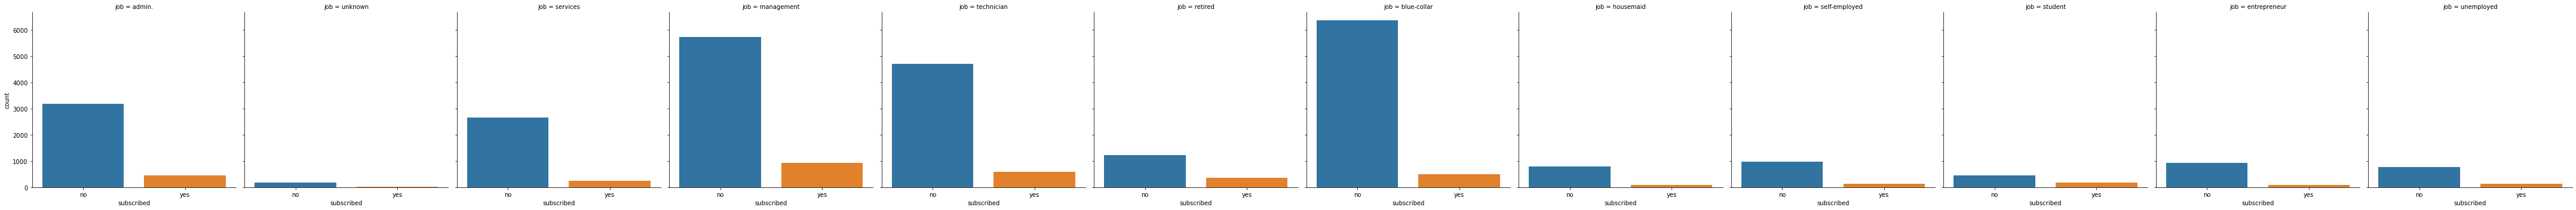

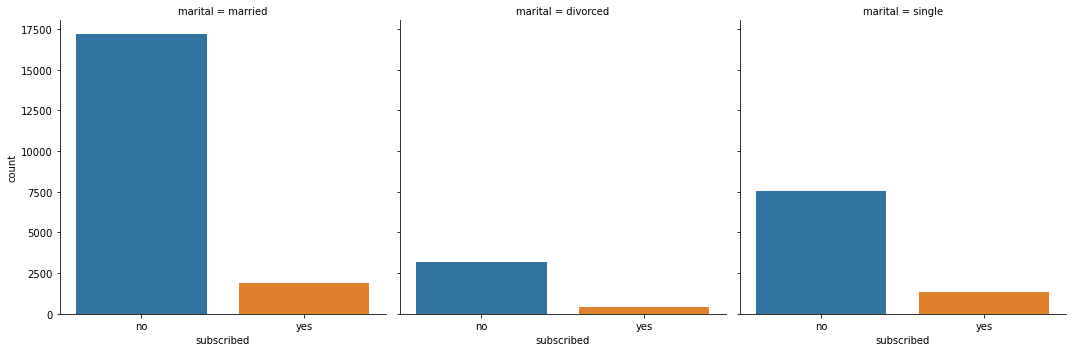

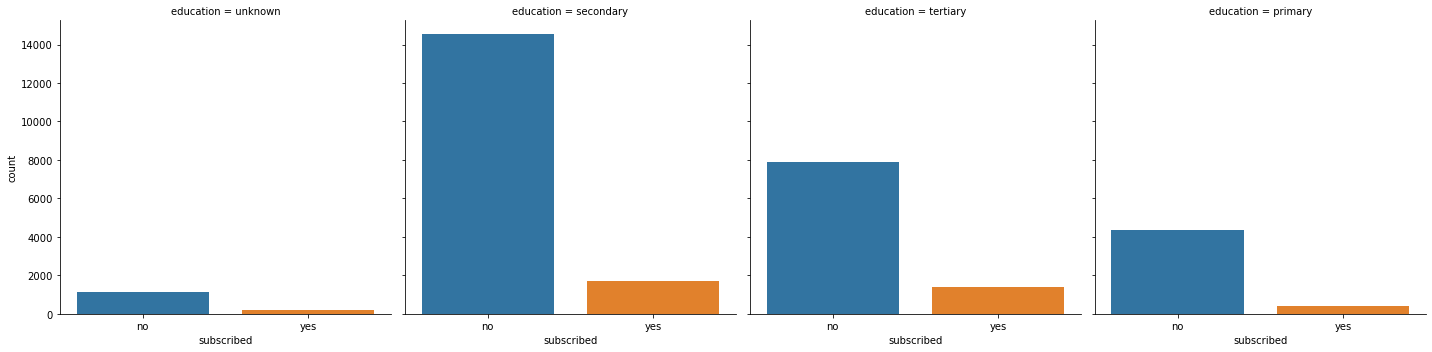

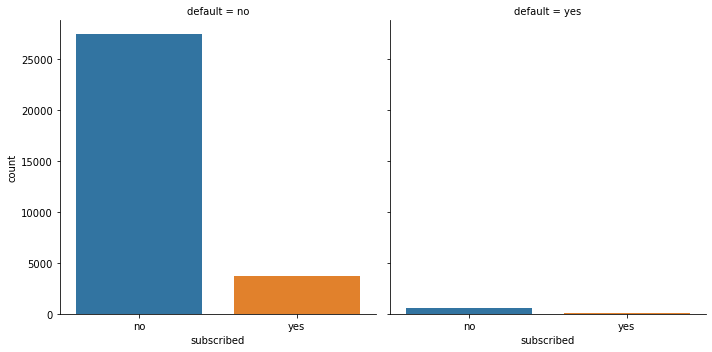

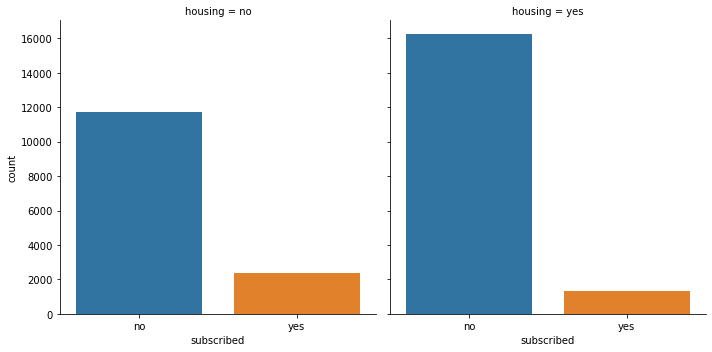

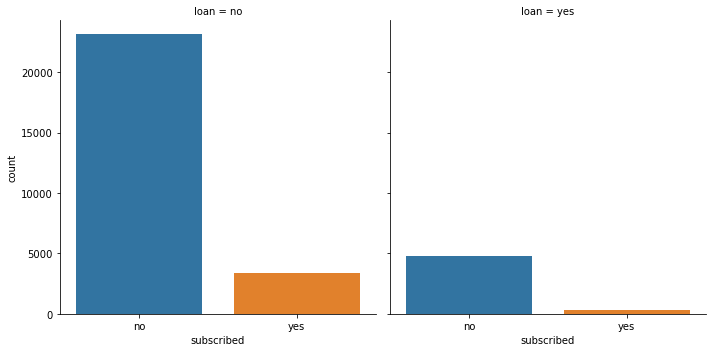

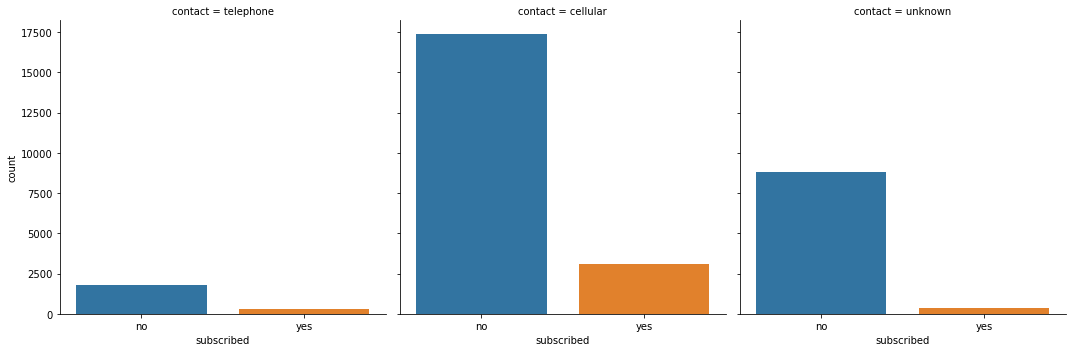

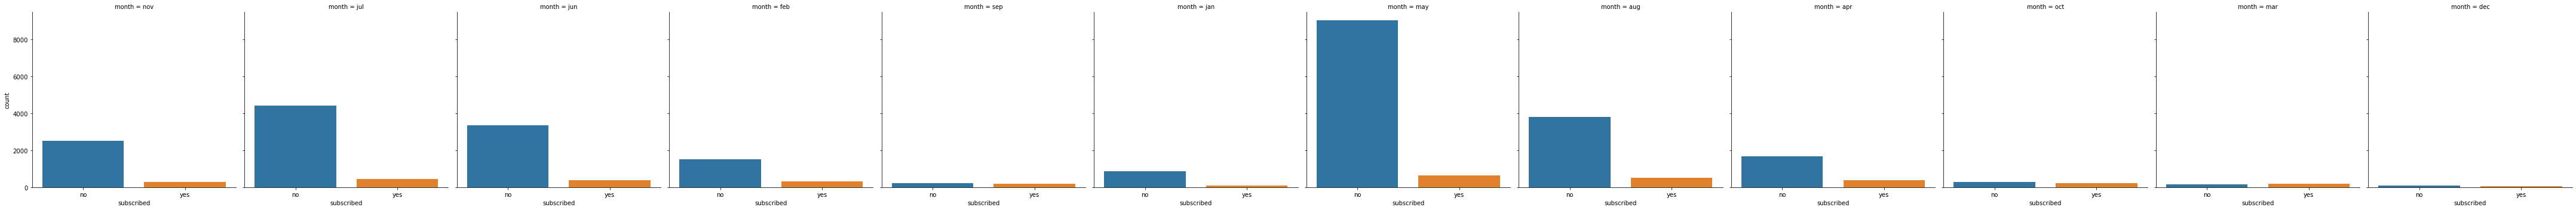

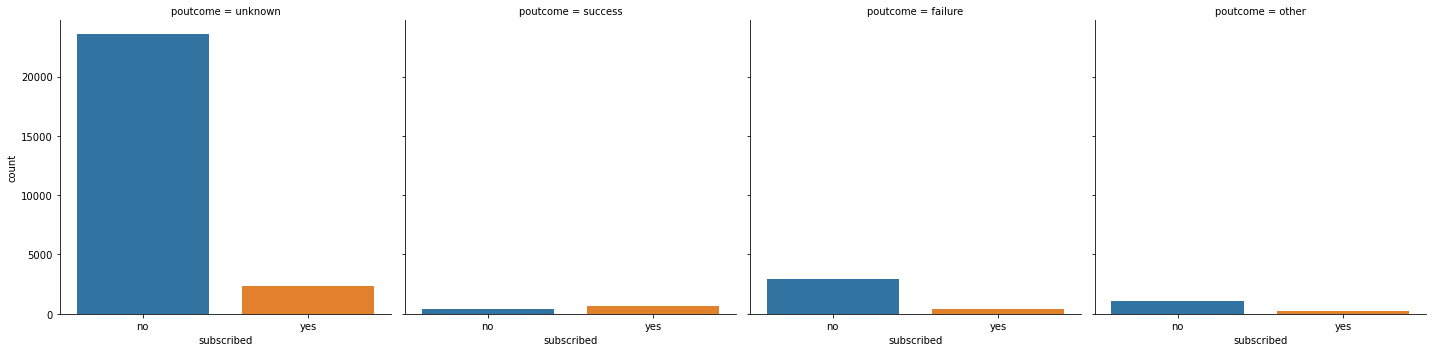

In [104]:
import seaborn as sns
for f in categoricalFeatures:
    sns.catplot(x='subscribed', col=f, kind='count', data= train)
plt.show()
# sns.catplot(x='subscribed', col='job', kind='count', data= train)    

Our conclusions from the above are as follows :
    If we look at 'job' variable then we have contacted a lot of people from 'management' field and a lot of them have also subscribed in comparison to other job profiles.
    Then we can see that a lot of tecnicians have also subscribed ans in comparison to other jobs a more tecnicians were contacted
    The hihghest numebr of contacts were made to people with "blue-collar" jobs but in comparison to "management and "technician" the number who ultimately subscribed to a term deposit is less
    Far less admins were contacted in comaparison to "blue-collar" but the number subsctibed is almost the same.
    
    Based on the above observations we can say that we should focus more on contacting "managment", "technician" and 
    "admins" as compared to "blue-collar"
    
    
 Mostly married people were contacted and less divorced people were contacted. Amny many people have sibscribed, and less divorced people have subscribed , but we can see many single people have also subscribed. 
    
    We should try from next time to contact more single people.

    In terms of education we should try contacting people with tertiary education more as they have turned out to subscribe     more percentage of times than compared to others 
    
     The people who have already default on some loan are very less likely to subscribe to a term deposit.

We can see people who do not have any housing loan are more likely to subscibe to term deposit, but less of them have been contacted as compared to people with housing loan.
       
       So we shoukd truy contacting more people with no housing loan
      
       For peosonal loans also peolple with no personal loan are more likely to subscibr to term deposit
       
        We can cleraly see that if cellular contact is done then the chances are more for people to subscibe to term deposit
        
        In months we should try to do more contacts in month of August
        
        If the poutcome is success then there are high chances for sople to subscibe to term deposit
     

    

# Exploring Numerical variables with respect to Target Variable

In [105]:
numericalFeatures = list()

for feature in train.columns :
    if train[feature].dtypes !='O' :
        numericalFeatures.append(feature)

In [106]:
print(numericalFeatures)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


## Distribution of numerical Varibales

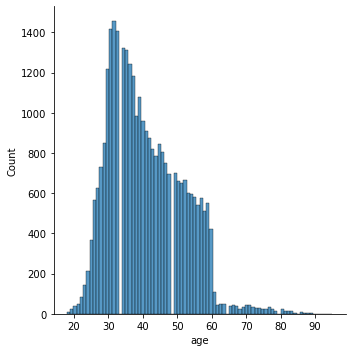

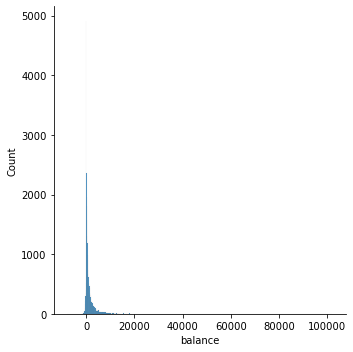

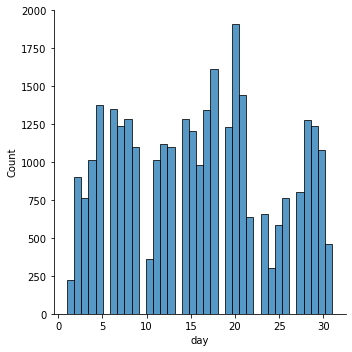

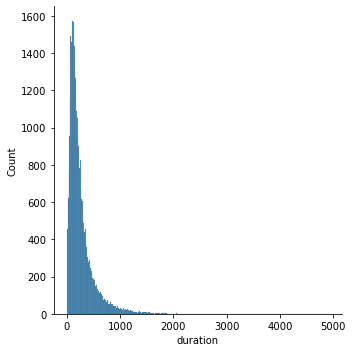

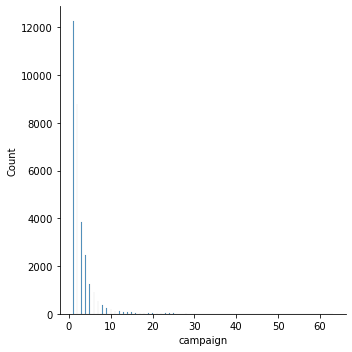

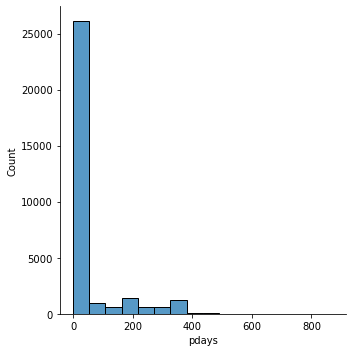

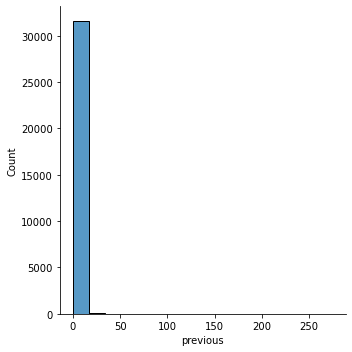

In [107]:
# plt.figure(figsize=(20,60), facecolor='white')
# plotnumber =1
for f in numericalFeatures:
#     ax = plt.subplot(12,3,plotnumber)
    sns.displot(train[f])
    plt.xlabel(f)
#     plotnumber+=1
    plt.show()

Age and days appear to be normally distrubuted others are skewed

In [108]:
print(" maximum age is : ",train['age'].max())
print(" minimum age is : ",train['age'].min())

 maximum age is :  95
 minimum age is :  18


### making age wise subscibtion status distionary

In [109]:
ageWiseSubscription = {}
ageWiseSubscription["10-20"] = [0,0,None]
ageWiseSubscription["20-30"] = [0,0,None]
ageWiseSubscription["30-40"] = [0,0,None]
ageWiseSubscription["40-50"] = [0,0,None]
ageWiseSubscription["50-60"] = [0,0,None]
ageWiseSubscription["60-70"] = [0,0,None]
ageWiseSubscription["70-80"] = [0,0,None]
ageWiseSubscription["80-90"] = [0,0,None]
ageWiseSubscription["90-100"] = [0,0,None]

In [110]:
for i in train.index:
    a = train['age'][i]
    s = train['subscribed'][i]
#     print(a,s)
    if a>10 and a<=20 :
        ageWiseSubscription["10-20"][0]+=1
        if s=="yes":
         ageWiseSubscription["10-20"][1]+=1
    if a>20 and a<=30 :
        ageWiseSubscription["20-30"][0]+=1
        if s=="yes":
         ageWiseSubscription["20-30"][1]+=1
    if a>30 and a<=40 :
        ageWiseSubscription["30-40"][0]+=1
        if s=="yes":
         ageWiseSubscription["30-40"][1]+=1
    if a>40 and a<=50 :
        ageWiseSubscription["40-50"][0]+=1
        if s=="yes":
         ageWiseSubscription["40-50"][1]+=1
    if a>50 and a<=60 :
        ageWiseSubscription["50-60"][0]+=1
        if s=="yes":
         ageWiseSubscription["50-60"][1]+=1
    if a>60 and a<=70 :
        ageWiseSubscription["60-70"][0]+=1
        if s=="yes":
         ageWiseSubscription["60-70"][1]+=1
    if a>70 and a<=80 :
        ageWiseSubscription["70-80"][0]+=1
        if s=="yes" :
         ageWiseSubscription["70-80"][1]+=1
    if a>80 and a<=90 :
        ageWiseSubscription["80-90"][0]+=1
        if s=="yes" :
         ageWiseSubscription["80-90"][1]+=1  
    if a>90 and a<=100 :
        ageWiseSubscription["90-100"][0]+=1
        if s=="yes" :
          ageWiseSubscription["90-100"][1]+=1  

            

In [111]:
for i in ageWiseSubscription.keys() :
    print(i,ageWiseSubscription[i])

10-20 [69, 26, None]
20-30 [4845, 766, None]
30-40 [12365, 1271, None]
40-50 [7845, 732, None]
50-60 [5698, 576, None]
60-70 [476, 197, None]
70-80 [281, 122, None]
80-90 [64, 22, None]
90-100 [4, 3, None]


In [112]:
ageGroup = []
subPer = []
for i in ageWiseSubscription.keys():
    ageWiseSubscription[i][2] = ageWiseSubscription[i][1]/ageWiseSubscription[i][0]
    ageGroup.append(i)
    subPer.append(ageWiseSubscription[i][2])
    print(i,ageWiseSubscription[i])

10-20 [69, 26, 0.37681159420289856]
20-30 [4845, 766, 0.15810113519091848]
30-40 [12365, 1271, 0.10279013344116458]
40-50 [7845, 732, 0.09330783938814531]
50-60 [5698, 576, 0.10108810108810108]
60-70 [476, 197, 0.41386554621848737]
70-80 [281, 122, 0.43416370106761565]
80-90 [64, 22, 0.34375]
90-100 [4, 3, 0.75]


## Graph of percentage subscribed per age group 

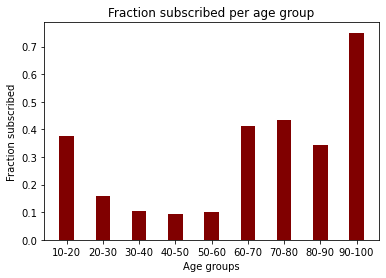

In [113]:

# creating the bar plot
plt.bar(ageGroup, subPer, color ='maroon',
        width = 0.4)
 
plt.xlabel("Age groups")
plt.ylabel("Fraction subscribed")
plt.title("Fraction subscribed per age group")
plt.show()

We can clearly see from the above graph that people of ages above 60 are more likely to subscibe to term deposits.
       Hence we should contact more of them

In [114]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [115]:
train['pdays'].value_counts()

-1      25924
 182      118
 92       100
 91        87
 183       85
        ...  
 51         1
 20         1
 25         1
 526        1
 382        1
Name: pdays, Length: 509, dtype: int64

As most of the pdays values are -1, hence we will drop pdays

In [116]:
print(train.shape,test.shape)
train.drop(['pdays'],axis=1,inplace=True)
test.drop(['pdays'],axis=1,inplace=True)
print(train.shape,test.shape)


(31647, 17) (13564, 16)
(31647, 16) (13564, 15)


In [117]:
numericalFeatures.remove('pdays')

## Looking for outliers in numerical features 

C:\Users\chira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chira\anaconda3\lib\si

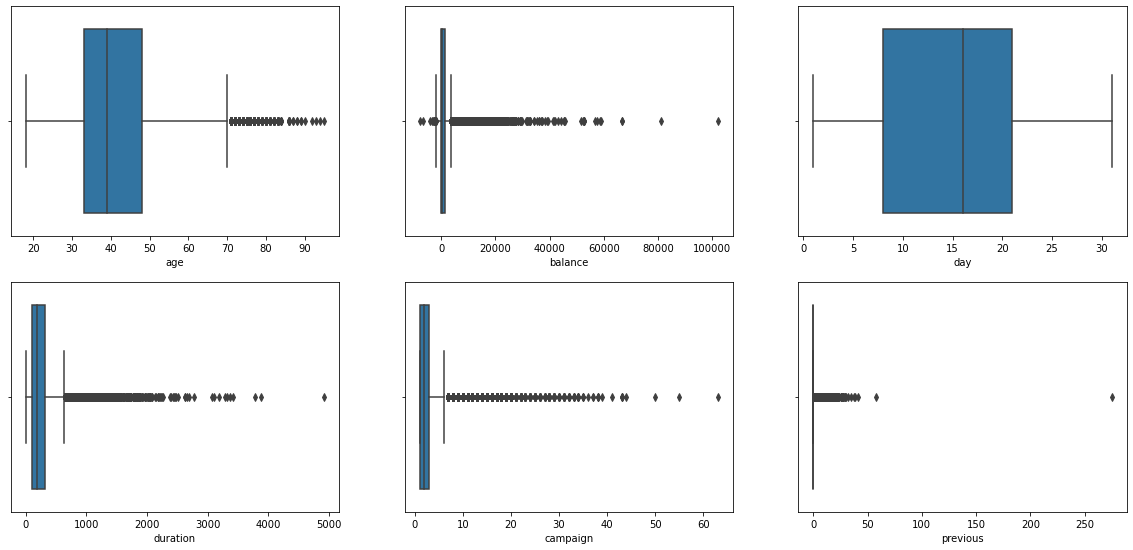

In [118]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for f in numericalFeatures:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(train[f])
    plt.xlabel(f)
    plotnumber+=1
plt.show()

We are not going to remove any outliers from 'age' because they just represent people with more age it cannot be seen as an data entry or recording error



## Removing some of the Outliers

In [119]:
train = train[train['duration']<3000]
train = train[train['campaign']<35]
train = train[train['previous']<50]

In [120]:
train.shape

(31617, 16)

In [121]:
temp = pd.get_dummies(train,columns=categoricalFeatures)

In [122]:
temp.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'subscribed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [123]:
originalTrain = train.copy(deep=True)

In [124]:
train = temp.copy(deep=True)
print(originalTrain.shape)
print(train.shape)

(31617, 16)
(31617, 51)


In [125]:
temp = pd.get_dummies(test,columns=categoricalFeatures)
originalTest = test.copy(deep=True)
print(originalTest.shape)
test = temp.copy(deep=True)
print(test.shape)

(13564, 15)
(13564, 50)


# Model Building

In [126]:
target = train['subscribed']
train.drop(['subscribed'],axis=1,inplace=True)


In [127]:
print(target.shape)
print(train.shape)

(31617,)
(31617, 50)


In [128]:
from sklearn.model_selection import train_test_split

In [129]:
from sklearn.linear_model import LogisticRegression

In [131]:
xTrain, xVal, yTrain, yVal = train_test_split(train, target, test_size = 0.2, random_state=12)

In [146]:
lreg = LogisticRegression(max_iter=2030)
lreg.fit(xTrain,yTrain)

LogisticRegression(max_iter=2030)

In [147]:
prediction = lreg.predict(xVal)

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(yVal, prediction)

0.896584440227704

# Decision Tree

In [149]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [150]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [151]:
predict = clf.predict(X_val)

In [152]:
accuracy_score(y_val, predict)

0.8950031625553447

In [153]:
testLregPrediction = lreg.predict(test)

In [154]:
testDtreePrediction = clf.predict(test)

In [155]:
sub1 = pd.DataFrame()
sub2 = pd.DataFrame()

In [156]:
#sub1['ID'] = test['ID']
sub1['subscribed'] = testLregPrediction
sub2['subscribed'] = testDtreePrediction

In [157]:
sub1['subscribed'].replace(0,'no',inplace=True)
sub1['subscribed'].replace(1,'yes',inplace=True)
sub2['subscribed'].replace(0,'no',inplace=True)
sub2['subscribed'].replace(1,'yes',inplace=True)

In [158]:
sub1.to_csv('submission1.csv', header=True, index=False)
sub2.to_csv('submission2.csv', header=True, index=False)